### IMPORT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Concatenate, Conv1D, LayerNormalization, MultiHeadAttention, Dropout, TimeDistributed, Bidirectional, Flatten, Add, MaxPooling1D
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical


### PARAMETRELER

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "SVM": KNeighborsRegressor(),
    "KNN": SVR(),
    "GBR": GradientBoostingRegressor()
}

### OKU / BİRLEŞTİR CSV

In [3]:
data1 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00000.csv')
data2 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00001.csv')
data3 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00002.csv')
data4 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00003.csv')
data5 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00004.csv')
data6 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00005.csv')
data7 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00006.csv')
data8 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00007.csv')
data9 = pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00008.csv')
data10= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00009.csv')
data11= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00010.csv')
data12= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00011.csv')
data13= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00012.csv')
data14= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00014.csv')
data15= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00014.csv')
data16= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00015.csv')
data17= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00016.csv')
data18= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00017.csv')
data19= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00018.csv')
data20= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00019.csv')
data21= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00020.csv')
data22= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00021.csv')
data23= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00022.csv')
data24= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00023.csv')
data25= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00024.csv')
data26= pd.read_csv('C:/Users/Osman/Desktop/DOCUMENTS/Hackathon/datasets/part-00025.csv')

In [4]:
len(data1.columns)

47

In [5]:
data1['label']
data1.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [6]:
print("data1:",data1.shape)
print("data2:",data2.shape)
print("data3:",data3.shape)
print("data4:",data4.shape)

data1: (238687, 47)
data2: (218805, 47)
data3: (275258, 47)
data4: (231023, 47)


In [7]:
dataframes = [data1, data2, data3, data4]
dataset1 = pd.concat(dataframes, ignore_index=True)
dataset = dataset1.copy()

In [8]:
dataset['label'].value_counts(dropna=False)

label
DDoS-ICMP_Flood            148212
DDoS-UDP_Flood             111514
DDoS-TCP_Flood              93138
DDoS-PSHACK_Flood           84881
DDoS-SYN_Flood              84236
DDoS-RSTFINFlood            83513
DDoS-SynonymousIP_Flood     74167
DoS-UDP_Flood               68579
DoS-TCP_Flood               54990
DoS-SYN_Flood               41558
BenignTraffic               22484
Mirai-greeth_flood          20319
Mirai-udpplain              18584
Mirai-greip_flood           15599
DDoS-ICMP_Fragmentation      9412
MITM-ArpSpoofing             6415
DDoS-ACK_Fragmentation       5917
DDoS-UDP_Fragmentation       5890
DNS_Spoofing                 3694
Recon-HostDiscovery          2770
Recon-OSScan                 2050
Recon-PortScan               1706
DoS-HTTP_Flood               1552
VulnerabilityScan             745
DDoS-HTTP_Flood               568
DDoS-SlowLoris                445
DictionaryBruteForce          300
BrowserHijacking              131
SqlInjection                  113
CommandI

In [9]:
etiket_sayilari = dataset['label'].value_counts()
etiket_sayilari_kucuk_50k = etiket_sayilari[etiket_sayilari < 50000].index.tolist()
print("Eleman sayısı 50 binden küçük olan etiketler:", etiket_sayilari_kucuk_50k)

Eleman sayısı 50 binden küçük olan etiketler: ['DoS-SYN_Flood', 'BenignTraffic', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood', 'DDoS-ICMP_Fragmentation', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation', 'DDoS-UDP_Fragmentation', 'DNS_Spoofing', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'DoS-HTTP_Flood', 'VulnerabilityScan', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris', 'DictionaryBruteForce', 'BrowserHijacking', 'SqlInjection', 'CommandInjection', 'Backdoor_Malware', 'XSS', 'Recon-PingSweep', 'Uploading_Attack']


In [10]:
satirlar_eklenecek = data2[data2['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data5[data5['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data6[data6['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data7[data7['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data8[data8['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data9[data9['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data10[data10['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data11[data11['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data12[data12['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data13[data13['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data14[data14['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data15[data15['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data16[data16['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data17[data17['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data18[data18['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data19[data19['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data20[data20['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data21[data21['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data22[data22['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data23[data23['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data24[data24['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data25[data25['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

satirlar_eklenecek = data26[data26['label'].isin(etiket_sayilari_kucuk_50k)]
dataset = pd.concat([dataset, satirlar_eklenecek], ignore_index=True)

In [11]:
dataset['label'].value_counts(dropna=False)

label
DoS-SYN_Flood              284016
BenignTraffic              154483
DDoS-ICMP_Flood            148212
Mirai-greeth_flood         138914
Mirai-udpplain             125377
DDoS-UDP_Flood             111514
Mirai-greip_flood          106338
DDoS-TCP_Flood              93138
DDoS-PSHACK_Flood           84881
DDoS-SYN_Flood              84236
DDoS-RSTFINFlood            83513
DDoS-SynonymousIP_Flood     74167
DoS-UDP_Flood               68579
DDoS-ICMP_Fragmentation     63614
DoS-TCP_Flood               54990
MITM-ArpSpoofing            43481
DDoS-UDP_Fragmentation      40794
DDoS-ACK_Fragmentation      40246
DNS_Spoofing                25268
Recon-HostDiscovery         18851
Recon-OSScan                13803
Recon-PortScan              11604
DoS-HTTP_Flood              10091
VulnerabilityScan            5249
DDoS-HTTP_Flood              4037
DDoS-SlowLoris               3348
DictionaryBruteForce         1784
BrowserHijacking              781
SqlInjection                  746
CommandI

### VERİ ANALİZİ

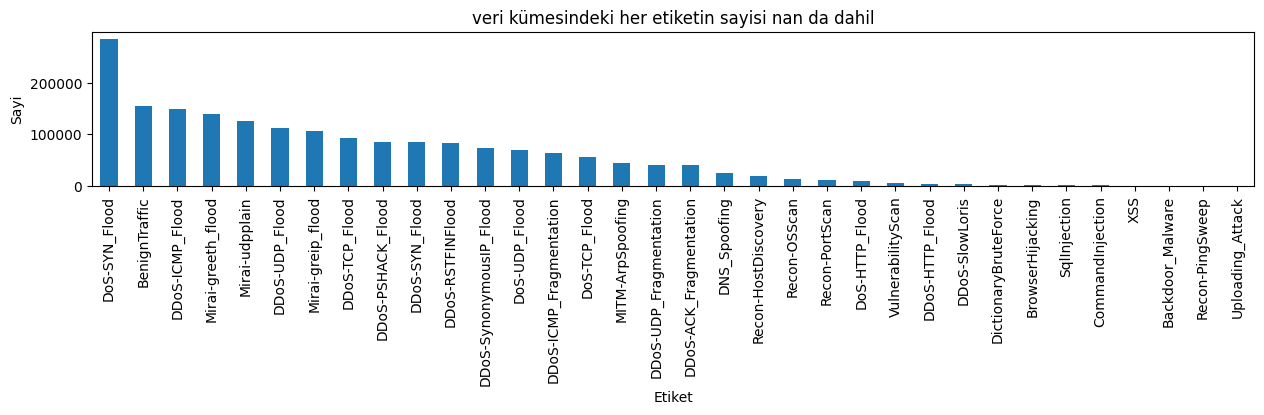

In [12]:

etiket_veri_sayisi = dataset['label'].value_counts(dropna=False)

plt.figure(figsize=(15, 2))  
etiket_veri_sayisi.plot(kind='bar')

plt.xlabel('Etiket')
plt.ylabel('Sayi')
plt.title('veri kümesindeki her etiketin sayisi nan da dahil')
plt.show()

In [13]:
labels_to_balance =  ["DoS-SYN_Flood",
    "BenignTraffic",
    "DDoS-ICMP_Flood" ,
    "Mirai-greeth_flood",
    "Mirai-udpplain",
    "DDoS-UDP_Flood",
    "Mirai-greip_flood"]



balanced_dataset = pd.concat([dataset[dataset['label'] == label].sample(80000, replace=True) if label in labels_to_balance else dataset[dataset['label'] == label] for label in dataset['label'].unique()])

balanced_dataset.reset_index(drop=True, inplace=True)
print(balanced_dataset['label'].value_counts())             
          
dataset=balanced_dataset.copy()

label
DDoS-TCP_Flood             93138
DDoS-PSHACK_Flood          84881
DDoS-SYN_Flood             84236
DDoS-RSTFINFlood           83513
Mirai-greip_flood          80000
DDoS-ICMP_Flood            80000
DoS-SYN_Flood              80000
Mirai-greeth_flood         80000
Mirai-udpplain             80000
DDoS-UDP_Flood             80000
BenignTraffic              80000
DDoS-SynonymousIP_Flood    74167
DoS-UDP_Flood              68579
DDoS-ICMP_Fragmentation    63614
DoS-TCP_Flood              54990
MITM-ArpSpoofing           43481
DDoS-UDP_Fragmentation     40794
DDoS-ACK_Fragmentation     40246
DNS_Spoofing               25268
Recon-HostDiscovery        18851
Recon-OSScan               13803
Recon-PortScan             11604
DoS-HTTP_Flood             10091
VulnerabilityScan           5249
DDoS-HTTP_Flood             4037
DDoS-SlowLoris              3348
DictionaryBruteForce        1784
BrowserHijacking             781
SqlInjection                 746
CommandInjection             729
XSS 

In [14]:
dataset['label'].unique()

dataset.shape

(1389419, 47)

In [15]:
print("Sütunların veri tipleri:")
print(dataset.dtypes)

veri_tipi_sayilari = dataset.dtypes.value_counts()

print("\nVeri tiplerine göre sütun sayıları:")
print(veri_tipi_sayilari)

Sütunların veri tipleri:
flow_duration      float64
Header_Length      float64
Protocol Type      float64
Duration           float64
Rate               float64
Srate              float64
Drate              float64
fin_flag_number    float64
syn_flag_number    float64
rst_flag_number    float64
psh_flag_number    float64
ack_flag_number    float64
ece_flag_number    float64
cwr_flag_number    float64
ack_count          float64
syn_count          float64
fin_count          float64
urg_count          float64
rst_count          float64
HTTP               float64
HTTPS              float64
DNS                float64
Telnet             float64
SMTP               float64
SSH                float64
IRC                float64
TCP                float64
UDP                float64
DHCP               float64
ARP                float64
ICMP               float64
IPv                float64
LLC                float64
Tot sum            float64
Min                float64
Max                float64
AVG

In [16]:
def kategorik_sutunlari_bul(dataframe, eşik_değer=10):

    kategorik_sutunlar = []
    for sutun in dataframe.columns:
        if dataframe[sutun].nunique() <= eşik_değer:
            print(sutun + " sütunundaki benzersiz eleman sayısı:", dataframe[sutun].nunique())
            kategorik_sutunlar.append(sutun)
    kategorik_sutunlar.append('label')
    return kategorik_sutunlar

kategorik_sutunlar = kategorik_sutunlari_bul(dataset)

dataset[kategorik_sutunlar] = dataset[kategorik_sutunlar].astype('category')


fin_flag_number sütunundaki benzersiz eleman sayısı: 2
syn_flag_number sütunundaki benzersiz eleman sayısı: 2
rst_flag_number sütunundaki benzersiz eleman sayısı: 2
psh_flag_number sütunundaki benzersiz eleman sayısı: 2
ack_flag_number sütunundaki benzersiz eleman sayısı: 2
ece_flag_number sütunundaki benzersiz eleman sayısı: 2
cwr_flag_number sütunundaki benzersiz eleman sayısı: 2
HTTP sütunundaki benzersiz eleman sayısı: 2
HTTPS sütunundaki benzersiz eleman sayısı: 2
DNS sütunundaki benzersiz eleman sayısı: 2
Telnet sütunundaki benzersiz eleman sayısı: 1
SMTP sütunundaki benzersiz eleman sayısı: 1
SSH sütunundaki benzersiz eleman sayısı: 2
IRC sütunundaki benzersiz eleman sayısı: 1
TCP sütunundaki benzersiz eleman sayısı: 2
UDP sütunundaki benzersiz eleman sayısı: 2
DHCP sütunundaki benzersiz eleman sayısı: 2
ARP sütunundaki benzersiz eleman sayısı: 2
ICMP sütunundaki benzersiz eleman sayısı: 2
IPv sütunundaki benzersiz eleman sayısı: 2
LLC sütunundaki benzersiz eleman sayısı: 2


In [17]:
bos_elemanlar = dataset.isnull().sum().sum()
bos_elemanlar


0

In [18]:
dataset.shape
datasetnew= dataset.copy()

In [19]:
etiket_sayilari = datasetnew['label'].value_counts()
etiket_sayilari_kucuk_14k = etiket_sayilari[etiket_sayilari < 14000].index.tolist()

In [20]:
import pandas as pd


label_column = 'label'
new_data = []

for label in etiket_sayilari_kucuk_14k:
    subset = datasetnew[datasetnew[label_column] == label]
    
    new_data.append(subset)
    new_data.append(subset)
    new_data.append(subset)


new_data.append(balanced_dataset)
balanced_dataset_expanded = pd.concat(new_data, ignore_index=True)

print(balanced_dataset_expanded.shape)





(1550402, 47)


In [21]:
balanced_dataset_expanded["label"].value_counts()

label
DDoS-TCP_Flood             93138
DDoS-PSHACK_Flood          84881
DDoS-SYN_Flood             84236
DDoS-RSTFINFlood           83513
Mirai-greip_flood          80000
BenignTraffic              80000
DDoS-UDP_Flood             80000
Mirai-udpplain             80000
Mirai-greeth_flood         80000
DoS-SYN_Flood              80000
DDoS-ICMP_Flood            80000
DDoS-SynonymousIP_Flood    74167
DoS-UDP_Flood              68579
DDoS-ICMP_Fragmentation    63614
Recon-OSScan               55212
DoS-TCP_Flood              54990
Recon-PortScan             46416
MITM-ArpSpoofing           43481
DDoS-UDP_Fragmentation     40794
DoS-HTTP_Flood             40364
DDoS-ACK_Fragmentation     40246
DNS_Spoofing               25268
VulnerabilityScan          20996
Recon-HostDiscovery        18851
DDoS-HTTP_Flood            16148
DDoS-SlowLoris             13392
DictionaryBruteForce        7136
BrowserHijacking            3124
SqlInjection                2984
CommandInjection            2916
XSS 

In [22]:
balanced_dataset_expanded.shape

(1550402, 47)

In [23]:
columns_to_drop = [ 
    'BrowserHijacking', 
    'SqlInjection', 
    'CommandInjection', 
    'XSS', 
    'Backdoor_Malware', 
    'Recon-PingSweep', 
    'Uploading_Attack'
]

condition = ~balanced_dataset_expanded['label'].isin(columns_to_drop)

df = balanced_dataset_expanded[condition]


In [24]:
df['label'].value_counts(dropna=False)

label
DDoS-TCP_Flood             93138
DDoS-PSHACK_Flood          84881
DDoS-SYN_Flood             84236
DDoS-RSTFINFlood           83513
Mirai-udpplain             80000
Mirai-greip_flood          80000
BenignTraffic              80000
DDoS-UDP_Flood             80000
DDoS-ICMP_Flood            80000
DoS-SYN_Flood              80000
Mirai-greeth_flood         80000
DDoS-SynonymousIP_Flood    74167
DoS-UDP_Flood              68579
DDoS-ICMP_Fragmentation    63614
Recon-OSScan               55212
DoS-TCP_Flood              54990
Recon-PortScan             46416
MITM-ArpSpoofing           43481
DDoS-UDP_Fragmentation     40794
DoS-HTTP_Flood             40364
DDoS-ACK_Fragmentation     40246
DNS_Spoofing               25268
VulnerabilityScan          20996
Recon-HostDiscovery        18851
DDoS-HTTP_Flood            16148
DDoS-SlowLoris             13392
DictionaryBruteForce        7136
Name: count, dtype: int64

### özellik şecimi

In [25]:
df1 = df.copy()

In [31]:
import pandas as pd
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df1.drop('label', axis=1)
y = df1['label']

X = pd.get_dummies(X)
le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

rfe = RFE(estimator=model, n_features_to_select=1, step=1)

rfe.fit(X_train, y_train)

ranking = rfe.ranking_

model.fit(X_train, y_train)
importances = model.feature_importances_

features = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking,
    'Importance': importances
})

features = features.sort_values(by='Ranking')

features.to_csv('feature_importances_rfe.csv', index=False)


In [26]:
sutunlar_kaldir = [
    'Duration', 'Max', 'Variance', 'Covariance', 'TCP', 'AVG', 'DNS', 
    'ack_flag_number', 'Std', 'IPv', 'Radius', 'ARP', 'ece_flag_number', 
    'IRC', 'cwr_flag_number', 'Drate', 'Srate', 'DHCP', 'LLC', 'SMTP', 
    'Telnet'
]

df1.drop(columns=sutunlar_kaldir, inplace=True)


In [28]:
df1.shape

(1535422, 26)

In [31]:
df1['label'].value_counts(dropna=False)

label
DDoS-TCP_Flood             93138
DDoS-PSHACK_Flood          84881
DDoS-SYN_Flood             84236
DDoS-RSTFINFlood           83513
Mirai-udpplain             80000
Mirai-greip_flood          80000
BenignTraffic              80000
DDoS-UDP_Flood             80000
DDoS-ICMP_Flood            80000
DoS-SYN_Flood              80000
Mirai-greeth_flood         80000
DDoS-SynonymousIP_Flood    74167
DoS-UDP_Flood              68579
DDoS-ICMP_Fragmentation    63614
Recon-OSScan               55212
DoS-TCP_Flood              54990
Recon-PortScan             46416
MITM-ArpSpoofing           43481
DDoS-UDP_Fragmentation     40794
DoS-HTTP_Flood             40364
DDoS-ACK_Fragmentation     40246
DNS_Spoofing               25268
VulnerabilityScan          20996
Recon-HostDiscovery        18851
DDoS-HTTP_Flood            16148
DDoS-SlowLoris             13392
DictionaryBruteForce        7136
Name: count, dtype: int64

In [38]:
attacks = [
    "DDoS-TCP_Flood",
    "DDoS-PSHACK_Flood",
    "DDoS-SYN_Flood",
    "DDoS-RSTFINFlood",
    "Mirai-udpplain",
    "Mirai-greip_flood",
    "BenignTraffic",
    "DDoS-UDP_Flood",
    "DDoS-ICMP_Flood",
    "DoS-SYN_Flood",
    "Mirai-greeth_flood",
    "DDoS-SynonymousIP_Flood",
    "DoS-UDP_Flood",
    "DDoS-ICMP_Fragmentation",
    "Recon-OSScan",
    "DoS-TCP_Flood",
    "Recon-PortScan",
    "MITM-ArpSpoofing",
    "DDoS-UDP_Fragmentation",
    "DoS-HTTP_Flood",
    "DDoS-ACK_Fragmentation",
    "DNS_Spoofing",
    "VulnerabilityScan",
    "Recon-HostDiscovery",
    "DDoS-HTTP_Flood",
    "DDoS-SlowLoris",
    "DictionaryBruteForce"
]
attacks[0]

'DDoS-TCP_Flood'

### XGBOOST

In [33]:
def kategorik_sutunlari_bul(dataframe, eşik_değer=10):

    kategorik_sutunlar = []
    for sutun in dataframe.columns:
        if dataframe[sutun].nunique() <= eşik_değer:
            print(sutun + " sütunundaki benzersiz eleman sayısı:", dataframe[sutun].nunique())
            kategorik_sutunlar.append(sutun)
    kategorik_sutunlar.append('label')
    return kategorik_sutunlar

kategorik_sutunlar = kategorik_sutunlari_bul(df1)

dataset[kategorik_sutunlar] = dataset[kategorik_sutunlar].astype('category')

fin_flag_number sütunundaki benzersiz eleman sayısı: 2
syn_flag_number sütunundaki benzersiz eleman sayısı: 2
rst_flag_number sütunundaki benzersiz eleman sayısı: 2
psh_flag_number sütunundaki benzersiz eleman sayısı: 2
HTTP sütunundaki benzersiz eleman sayısı: 2
HTTPS sütunundaki benzersiz eleman sayısı: 2
SSH sütunundaki benzersiz eleman sayısı: 2
UDP sütunundaki benzersiz eleman sayısı: 2
ICMP sütunundaki benzersiz eleman sayısı: 2


In [34]:
from sklearn.preprocessing import LabelEncoder

X = df1.drop("label", axis=1)
y = df1['label']

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [41]:
model = xgb.XGBClassifier(enable_categorical=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Model Accuracy:", accuracy)
print("Model F1 Score:", f1)

Model Accuracy: 0.9726785743360958
Model F1 Score: 0.9725497611040768


In [42]:
df1.to_csv("df.csv", index=False)

In [52]:
y_test

array([ 3, 10,  4, ..., 25, 16,  5])

In [43]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

## transformer regresyon

In [29]:


models = {
    "Linear Regression": LinearRegression(),
    "SVM": KNeighborsRegressor(),
    "KNN": SVR(),
    "GBR": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    print(name + ":")
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    rmse = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)
    
   
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2*100)
    print("RMSE:",rmse)
    print("\n")




def bidirectional_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=16, kernel_size=2, activation='relu')(inputs)
    x1 = Conv1D(filters=32, kernel_size=2, activation='relu')(x)
    x1=MaxPooling1D(pool_size=2)(x1)

    x1 = Conv1D(filters=64, kernel_size=2, activation='relu')(x1)
    x1 = LayerNormalization()(x1)

    # Transformer Encoder layers
    x2 = MultiHeadAttention(num_heads=8, key_dim=64)(x1, x1)
    x2 = Dropout(0.1)(x2)
    x3 = LayerNormalization()(x2)
    x4= Add()([x1, x3])  # Adding skip connection

    x5 = TimeDistributed(Dense(128, activation='relu'))(x4)
    x5 = TimeDistributed(Dense(64, activation='relu'))(x5)
    x5 = LayerNormalization()(x4)

    x5 = Add()([x4, x5])  # Adding skip connection

    # LSTM layer
    x6 = LSTM(units=150, return_sequences=True)(x5)
    
    # Flatten layer
    x7 = Flatten()(x6)
    
    # Fully connected layers
    x8 = Dense(300, activation='relu')(x7)
    outputs = Dense(1)(x8)

    model = Model(inputs=inputs, outputs=outputs)
    return model



# Create the Transformer model
transformer_model = bidirectional_transformer_model(input_shape=(X_train.shape[1], 1))
transformer_model.summary()

# Compile and train the model
transformer_model.compile(optimizer='adam', loss='mean_squared_error')
transformer_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), 
                      y_train, 
                      epochs=1000, 
                      batch_size=16, 
                      verbose=1)
# Evaluate the model
y_test_pred_lstm = transformer_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

# Performance metrics calculation
mae_lstm = mean_absolute_error(y_test, y_test_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_test_pred_lstm)
r2_lstm = r2_score(y_test, y_test_pred_lstm)
rmse_lstm = mean_squared_error(y_true=y_test, y_pred=y_test_pred_lstm, squared=False)

# Print the results
print("Attention-based LSTM model:")
print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error (MSE):", mse_lstm)
print("R-squared (R2):", r2_lstm * 100)
print("Root Mean Squared Error (RMSE):", rmse_lstm)

Linear Regression:
Mean Absolute Error (MAE): 4.02111659168775
Mean Squared Error (MSE): 30.8172979637679
R-squared (R2): 46.4614800824458
RMSE: 5.551332989811357




c:\Users\Osman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

# Model isimleri
models = ["Linear Regression", "SVM", "KNN", "GBR", "Attention-based LSTM"]

# Hata metrikleri
mae = [mae_lr, mae_svm, mae_knn, mae_gbr, mae_lstm]
mse = [mse_lr, mse_svm, mse_knn, mse_gbr, mse_lstm]
r2 = [r2_lr, r2_svm, r2_knn, r2_gbr, r2_lstm]
rmse = [rmse_lr, rmse_svm, rmse_knn, rmse_gbr, rmse_lstm]

# Metrikleri içeren çizgi grafiği
plt.figure(figsize=(10, 6))
plt.plot(models, mae, marker='o', label='Mean Absolute Error (MAE)')
plt.plot(models, mse, marker='o', label='Mean Squared Error (MSE)')
plt.plot(models, r2, marker='o', label='R-squared (R2)')
plt.plot(models, rmse, marker='o', label='Root Mean Squared Error (RMSE)')
plt.title('Model Performansı')
plt.xlabel('Modeller')
plt.ylabel('Performans Metrikleri')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## transformer sınıflandırma

In [28]:
X = df1.drop('label', axis=1)
y = df1['label']

# Kategorik sınıfların etiketlenmesi
X = pd.get_dummies(X)
le = LabelEncoder()
y = le.fit_transform(y)

# Veri kümesini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modellerin tanımlanması
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GBR": GradientBoostingClassifier()
}

# Modellerin eğitimi ve doğruluk ve F1 skorlarının yazdırılması
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    
    print(name + ":")
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("\n")

# Transformer modelin tanımlanması ve eğitimi
def bidirectional_transformer_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=16, kernel_size=2, activation='relu')(inputs)
    x1 = Conv1D(filters=32, kernel_size=2, activation='relu')(x)
    x1 = MaxPooling1D(pool_size=2)(x1)
    x1 = Conv1D(filters=64, kernel_size=2, activation='relu')(x1)
    x1 = LayerNormalization()(x1)
    x2 = MultiHeadAttention(num_heads=8, key_dim=64)(x1, x1)
    x2 = Dropout(0.1)(x2)
    x3 = LayerNormalization()(x2)
    x4 = Add()([x1, x3])
    x5 = TimeDistributed(Dense(128, activation='relu'))(x4)
    x5 = TimeDistributed(Dense(64, activation='relu'))(x5)
    x5 = LayerNormalization()(x5)
    x5 = Add()([x4, x5])
    x6 = LSTM(units=150, return_sequences=True)(x5)
    x7 = Flatten()(x6)
    x8 = Dense(300, activation='relu')(x7)
    outputs = Dense(num_classes, activation='softmax')(x8)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Kategorik etiketleri one-hot encode etme
num_classes = len(set(y_train))
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Transformer modelin oluşturulması
transformer_model = bidirectional_transformer_model(input_shape=(X_train.shape[1], 1), num_classes=num_classes)
transformer_model.summary()

# Modelin derlenmesi ve eğitilmesi
transformer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
transformer_model.fit(X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], 1)), 
                      y_train_categorical, 
                      epochs=100, 
                      batch_size=16, 
                      verbose=1)

# Modelin değerlendirilmesi
y_test_pred_lstm_prob = transformer_model.predict(X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], 1)))
y_test_pred_lstm = y_test_pred_lstm_prob.argmax(axis=1)

# Performans metriklerinin hesaplanması
accuracy_lstm = accuracy_score(y_test, y_test_pred_lstm)
f1_lstm = f1_score(y_test, y_test_pred_lstm, average='weighted')

# Sonuçların yazdırılması
print("Attention-based LSTM model:")
print("Accuracy:", accuracy_lstm)
print("F1 Score:", f1_lstm)
